## Starbucks Dataset
- This data was provided by Starbucks to simulate their customers and transactions to see if there are better approaches to sending customers specific promotional deals.

### Metadata

#### portfolio
- Information about the promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers
- [reward] 보상의 정도
- [channels] 프로모션이 전달된 경로
- [difficulty] 설문이 완성되는데 필요한 최소 시간
- [duration] 프로모션 기간
- [offer_type] 프로모션 종류 BOGO(Buy One, Get One), discount, informational

#### profile
- 이벤트와 관련된 회원들의 정보
- Dimensional data about each person, including their age, salary, and gender. There is one unique customer for each record.
- [gender]
- [age]
- [became_member_on] 어플리케이션 계정이 만들어진 날
- [income] 수익

#### transcript
- Records show the different steps of promotional offers that a customer received. The different values of receiving a promotion are receiving, viewing, and completing. You also see the different transactions that a person made in the time since he became a customer. With all records, you see the day that they interacted with Starbucks and the amount that it is worth.
- 이벤트에 참여한 실제 유저들의 응답 데이터
- [person] 고객의 id
- [event] 프로모션 기록 형태 $transaction$, $offer \, received$, $offer \, viewed$
- [value] 기록에 따른 id or transaction - 이벤트를 어떻게 했는가
- [time] 얼마 내에 이벤트에 응답을 했는가

### 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와 라이브러리를 불러옴

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
transcript = pd.read_csv('./data/starbucks/transcript.csv')
profile = pd.read_csv('./data/starbucks/profile.csv')
portfolio = pd.read_csv('./data/starbucks/portfolio.csv')

In [4]:
transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [9]:
# 필요하지 않은 column 제거
transcript.drop(columns=["Unnamed: 0"], inplace=True)
profile.drop(columns=["Unnamed: 0"], inplace=True)
portfolio.drop(columns=["Unnamed: 0"], inplace=True)

In [11]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [10]:
profile

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


- NaN 이 포함된 정보자 있음 -> 전처리 필요
- 유저의 id 에 대한 암호화가 되어 있음

In [12]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


- [offer_type - informational] 정보를 주는것? 유저들이 얻는게 없고(reward = 0), 어려움도 없다(difficulty = 0)
- [offer_type - discount] 할인
- [offer_type - bogo] buy one get one 쿠폰

### 2. 데이터 전처리
- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리한다.

In [15]:
# 데이터의 결측치 확인
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


- (17000 - 14825) 개의 결측치가 $gender$, $income$ column 에 있다.

In [35]:
# 결측치를 포함하는 데이터들이 어떤 데이터들인지 확인한다.
profile_nulls = profile[profile.isnull().any(axis=1)]
print(profile_nulls.gender.value_counts())
print(profile_nulls.income.value_counts())
print(profile_nulls.age.value_counts())
print(profile_nulls.id.nunique())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
age
118    2175
Name: count, dtype: int64
2175


- gender 와 income 은 모두 Nan 으로 되어있음.
- age 의 나이가 118 로 되어있다. -> 이미 결측치에 대한 처리가 되어있음. (Nan 과 동일해보임)
- id 가 모두 다름.
- 해당 데이터는 버려진 데이터라 생각할 수 있다. 또한, 결측치를 채울 수 있는 방법이 전혀 없다.

In [39]:
# Nan 데이터를 포함하는 rows 삭제
profile.dropna(inplace=True)

In [ ]:
# became_member_on 데이터를 시간 정보로 변환해준다.
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')

In [41]:
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [42]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


- became_member_on 의 바뀐 Dtype을 확인할 수 있다.

##### 성별에 관한 분석

In [44]:
profile.gender.value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

C:\Users\hmk40\AppData\Local\Temp\ipykernel_11324\2292825129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=profile, x="gender", palette="Set2")


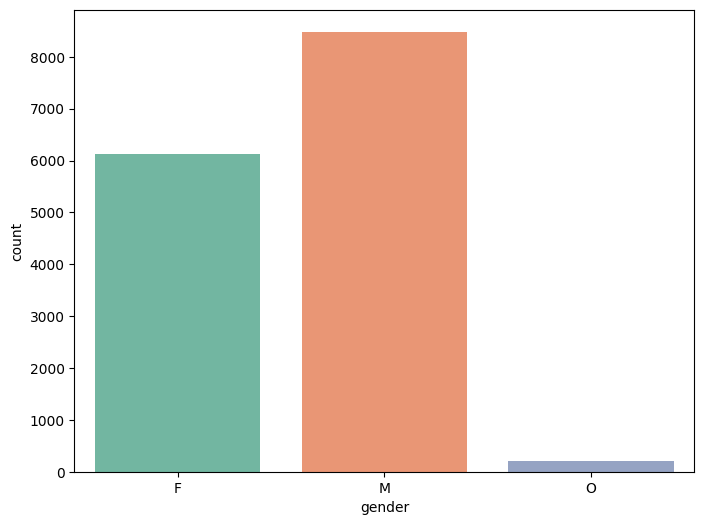

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(data=profile, x="gender", palette="Set2")
plt.show()

In [45]:
pd.pivot_table(profile, index="gender", values="income")

,income
gender,
F,71306.412139
M,61194.601603
O,63287.735849


- 이벤트에 응답한 유저에 대해서, 여성들의 수입 평균이 남성보다 높다

##### 나이에 대한 분석

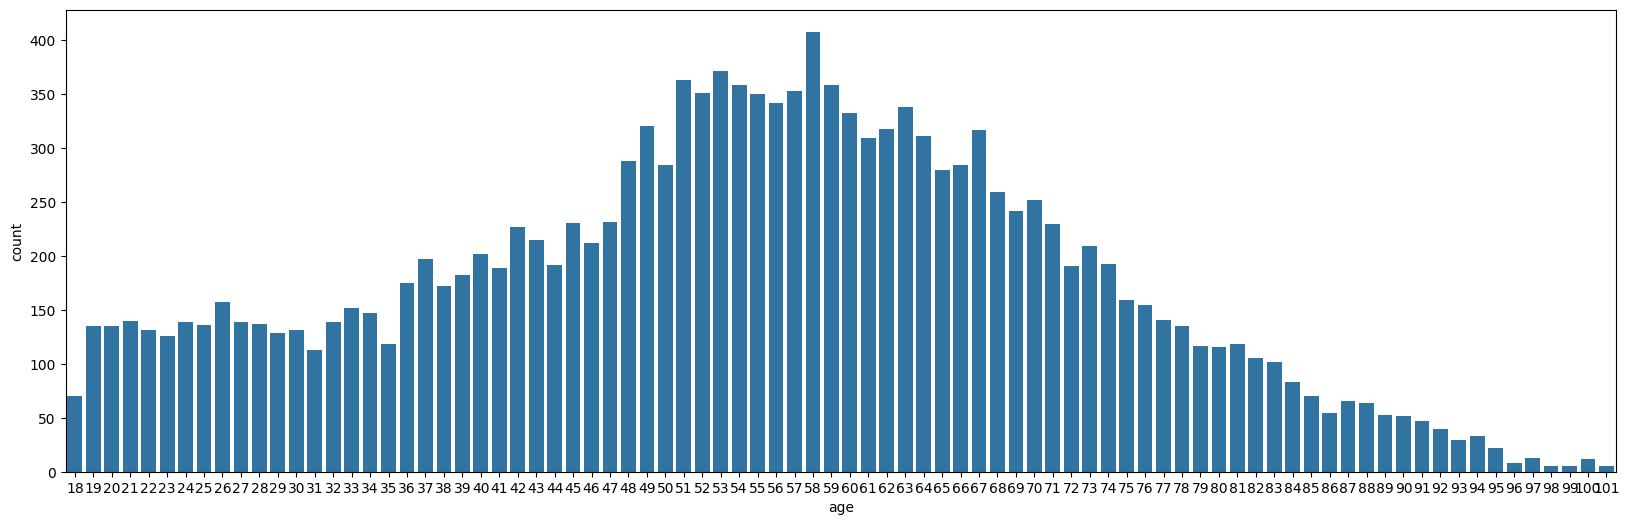

In [50]:
plt.figure(figsize=(20,6))
sns.countplot(data=profile, x="age")
plt.show()

- 정규 분포형태까지는 아니지만 40대 후반부터 60대 중반까지가 많고, 50대가 가장 많다.
- 해당 데이터는 countplot 보다는 histogram 을 찍는 것이 일반적이다 
    - 전반적인 range 가 18~101 까지 매우 크다.
    - 전체연령대 하나하나를 봐도 좋긴하지만, 얼마나 퍼져있는지를 보고 싶다.

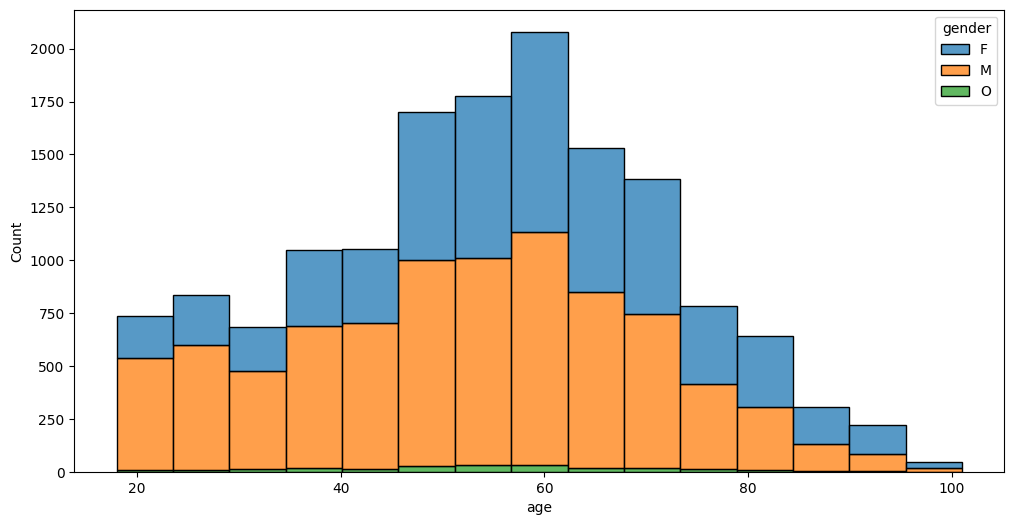

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(data=profile, x="age", bins=15, hue="gender", multiple="stack")
plt.show()

In [56]:
pd.pivot_table(data=profile, index="gender", values=["age", "income"])

,age,income
gender,,
F,57.544950,71306.412139
M,52.116690,61194.601603
O,54.400943,63287.735849


- 연령대가 높은쪽이 income 평균이 높게 나타난다.

##### 회원이 된 날짜에 대한 분석

In [58]:
profile["join_year"] = profile.became_member_on.dt.year
profile["join_month"] = profile.became_member_on.dt.month

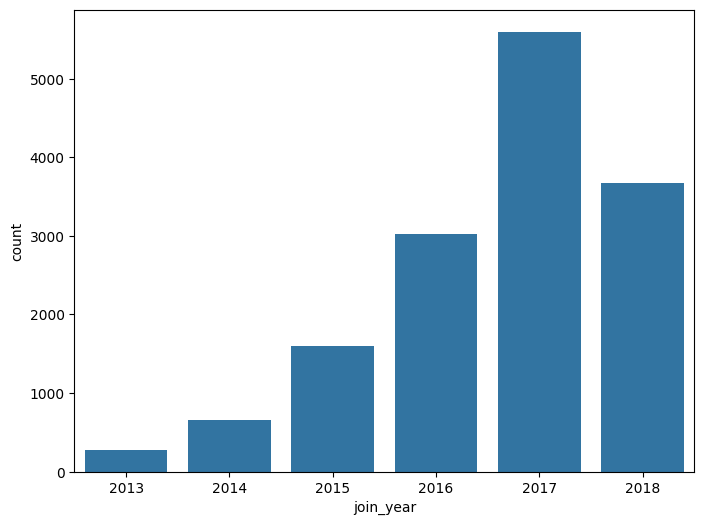

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(data=profile, x="join_year")
plt.show()

C:\Users\hmk40\AppData\Local\Temp\ipykernel_11324\3882994715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, order=x, palette="Set2")


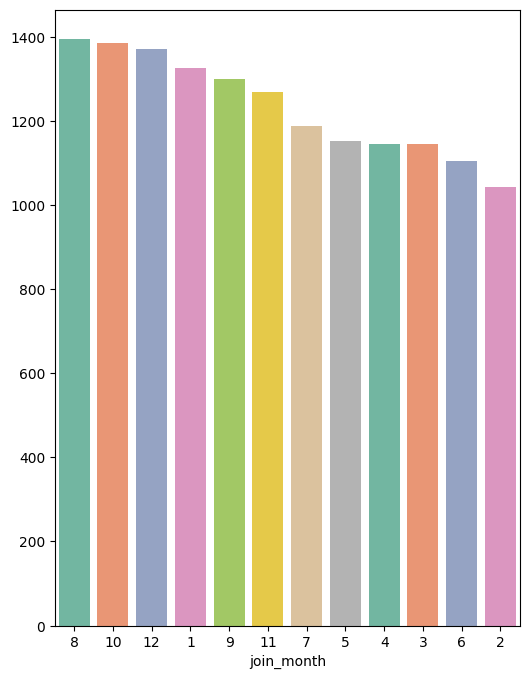

In [66]:
x = profile.join_month.value_counts().index
y = profile.join_month.value_counts().values
plt.figure(figsize=(6,8))
sns.barplot(x=x, y=y, order=x, palette="Set2")
plt.show()